*JJ McCauley*

## Regression for Computer Hardware Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Retreiving the dataset
computer_hardware_df = pd.read_csv("machine.data")
X = computer_hardware_df.iloc[:, 3:8]  # Import columns 3-8
y = computer_hardware_df.iloc[:, -1]

# Determining correlations to select 4 most important attributes
correlations = pd.concat([X, y], axis=1).corr()
target_correlations = correlations.iloc[:-1, -1]
chosen_features = target_correlations.abs().sort_values(ascending=False).head(4)
X_new = X[chosen_features.index]

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=.4, random_state=42)

# Building the Linear Regression Model 
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

# Displaying the metrics
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE):  34.164566195073476
Mean Squared Error (MSE):  2597.292739775501
Root Mean Squared Error:  50.963641351217255
r2 Score:  0.8553522616522726


## Clustering on Hand-Written Digits

Transformed from 64 to 17 dimensions
Center for cluster 1: [ -0.36628916 -15.78987048 -11.42776917   7.61265889  -6.87315759
   7.88178269  -1.69448734   1.44957133   0.5653416    0.09232181
  -1.2372888    2.09002646  -0.32643328   1.09912253   0.71829507
   1.17454348  -0.11921665]

Center for cluster 2: [ 1.83881382 21.16308205 -4.58970741  8.43865003 -7.9258948  -8.22766858
  2.00642432  0.16075363  0.46257095  1.67478643 -0.9169315   0.31187262
 -1.71901171 -2.03458795  0.68790892  1.84244232  0.60691048]

Center for cluster 3: [  4.34581796 -14.01497515   4.87638493  -3.19778991  -3.2156708
  -7.39514351  -4.06513062  -3.73692882   0.79197826  -0.25065648
   2.09085817   0.2503018    1.222836    -3.1315229   -0.3726726
  -0.19050838   0.18049331]

Center for cluster 4: [16.00940298 11.52163494 13.8756246  -2.807488    0.55105937  8.57406399
 -2.33484877 -3.48793351 -2.4048943  -0.31372473 -1.05185734  2.19826902
  0.79556004  0.48373104  0.07457674  1.31977121 -0.79694098]

Cente

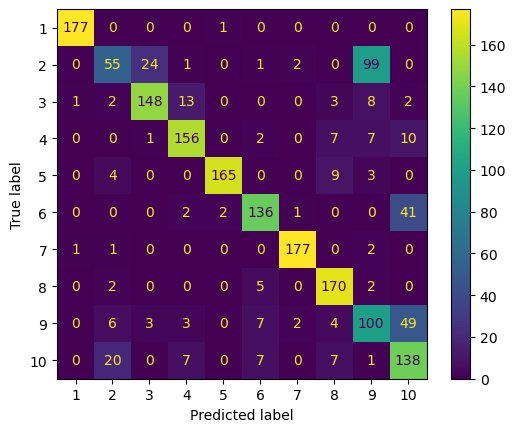

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from scipy.stats import mode

# Load in the data from sklearn library
digits_loaded_data = load_digits()
X = digits_loaded_data.data
y = digits_loaded_data.target

# Conduct PCA to reduce dimensionality
MIN_VARIANCE = .85  # Minimum variance required
_, initital_features = X.shape
pca = PCA()  # Used to determine n_components needed
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= MIN_VARIANCE) + 1
pca = PCA(n_components=n_components)  # Now that n_components is known, using PCA to transform data
X_new = pca.fit_transform(X)
print(f"Transformed from {initital_features} to {n_components} dimensions")

# Clustering using k-means and outputting cluster centers
NUM_CLUSTERS = 10  # Cluster for each digit (known value)
kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, max_iter=750, n_init=50)  # Increasing default parameters since computational expense is not a concern
kmeans_model.fit(X_new)
centers = kmeans_model.cluster_centers_
for i, center in enumerate(centers):
    print(f"Center for cluster {i+1}: {centers[i]}\n")

# Matching each cluster to label
clusters_pred = kmeans_model.predict(X_new)
labels = np.zeros_like(clusters_pred)
for i in range(10):
    mask = (clusters_pred == i)
    labels[mask] = mode(digits_loaded_data.target[mask])[0]

# Outputting relevant metrics
print(f"Accuracy Score for KMeans Clustering: {accuracy_score(y, labels)}\n")
print(f"Classification Report:\n{classification_report(y, labels)}")
clusters_cm = confusion_matrix(y, labels)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=clusters_cm, display_labels=[i for i in range(1, 11, 1)])
cmdisplay.plot()
plt.show()